# Chapter 4 신경망 학습

학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻합니다. 이번 Chapter에서는 신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 소개합니다.

신경망의 특징은 데이터를 보고 학습할 수 있다는 점입니다. 

기계학습은 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만듭니다. 그래서 항상 기계학습의 중심에는 데이터가 존재합니다. 이처럼 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있습니다. 하지만 사람이 학습에 필요한 특징을 사람이 설계합니다. 

딥러닝(aka end to end machine learning)은 기계학습과 다르게 있는 그대로 학습합니다. 

기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행합니다. 훈련 데이터에서 최적의 매개변수를 찾고 시험 테이터를 사용하여 훈란한 모델의 실력을 평가하는 것입니다. 데이터를 두 개로 나누는 이유는 범용성을 평가하기 위해서입니다. 훈련 데이터로 학습한 기계학습을 시험 데이터로 평가해 범용 능력을 확인하기 위해서 입니다. 

또한 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 합니다. 

손실 함수 
- 신경망 학습에서는 현재의 상태를 하나의 지표로 표현합니다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것입니다. 
- 신경망에서는 이 함수를 손실 함수라고 합니다. 
- 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용합니다. 

오차제곱합 

$$ E = \frac{1}{2} \sum \limits _{k} (y_{k} - t_{k})^2$$ 

여기서 yk는 신경망의 출력, tk는 정답 레이블, k는 데이터의 차원 수를 나타냅니다. 이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 0, 1, 2 ...일 때의 값입니다. 여기에서 신경망의 출력 y는 소프트맥스 함수의 출력입니다. 

In [43]:
## 오차제곱합 
import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) **2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


첫 번재 결과값에서 손실함수의 값이 작으니 춧 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있습니다.

교차 엔트로피 오차 

$$ E = \sum \limits _{k} t_{k} \log y_{k}$$ 

여기서 yk는 신경망의 출력, tk는 정답 레이블입니다. 또 tk는 정답에 해당하는 인덱스의 원소만 1이고 1이고 나머지는 0입니다. (원-핫 인코딩). 그래서는 실질적으로 정답일 때의 추정(tk가 1일 때의 yk)의 자연로그를 계산하는 식이 됩니다. 

In [44]:
## cross_entropy 구현 
def cross_entropy_error(y, t): 
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


오차제곱합과 같이 첫 번째 entropy 값이 훨씬 작기 때문에 오차제곱합과 엔트로피의 판단이 일치합니다. 

미니배치 학습

지금까지 데이터 하나에 대한 손실 함수만 생각해왔으니, 이제 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각 할 차례입니다.

교차 엔트로피 오차의 공식을 다수의 데이터로 생각했을 때 아래의 공식이 나옵니다.

$$E = - \frac{|1}{N} \sum \limits _{n} \sum \limits _{k} t_{nk} \log y_{nk}$$ 

이때 데이터가 N개라면 tnk는 n번째 데이터의 k번째 값을 의미합니다 (ynk는 신경망의 출력 tk는 정답 레이블입니다).  

하지만 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 많이 소요됩니다. 그래서 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행하며 이 일부를 mini-batch라고 합니다. 예를 들어 10000 장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만 사용하여 학습하는 것을 미니배치 학습이라고 합니다. 

In [45]:
## mini-batch 
import sys, os 
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, normalize=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10 
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## or 
np.random.choice(60000, 10)

(60000, 784)
(60000, 10)


array([19033, 46706, 48548,   209, 23940, 15663, 26071, 31871, 24416,
       32378])

In [46]:
## cross_entropy 
## one hot encoding 
## since only one element equals one while rest equals zero, ignore the computation 
def cross_entropy_error(y, t): 
    if y.ndim == 1: 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾ㅅ습니다. 이때 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다. 가령 가상의 신경망이 있고 그 신경망의 어느 한 가중치 매개변수에 주목한다고 합시다. 이때 그 가중치 매개변수의 손실 함수의 미분이란 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나라는 의미입니다. 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있고 만약 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있습니다. 그러나 미분 값이 0이면 가중치 매개변수의 갱신이 멈춥니다. 

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문입니다. 

만약 정확도를 지표로 삼으면 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32%로일 것입니다. 즉 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지됩니다. 혹, 정확도가 개선된다 하더라도그 값은 연속적인 변화보다는 33%나 34%처럼 불연속적인 띄엄띄엄한 값으로 바뀌어버립니다.

수치 미분 
- 수치 미분은 작은 차분으로 미분하는 것으로 근사값을 구하는 것입니다. 

In [47]:
## 수치 미분 예제 
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)
def function_1(x): 
    return 0.01 * x**2 + 0.1 * x

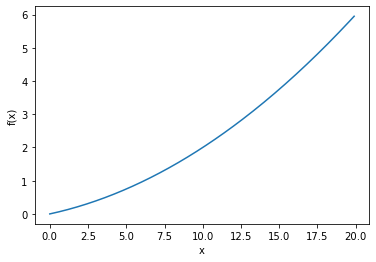

0.1999999999990898
0.2999999999986347


In [48]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

편미분
- 변수가 여럿인 함수에 대한 미분을 편미분이라고 합니다

In [49]:
def function_2(x):
    return x[0] **2 + x[1] ** 2

def function_tmp1(x0):
    return x0 * x0 + 4.0 **2.0

def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1


print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


기울기 
- 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 합니다.

In [50]:
def numerical_gradient(f, x): 
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산 
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산 
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [51]:
print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


경사법 
- 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없기에 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법입니다.
- 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나 그 방향으로 가야 함수의 값을 줄일 수 있습니다. 그래서 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 합니다. 
- 경사법은 현 위치에서 기울어진 방향으로 일정 기리만큼 이동합니다. 그런 다음 이동한 곳에서도 또 기울기를 구하고 그 기울어진 방향으로 나아가기를 반복합니다. 
- 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법입니다. 


In [52]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [53]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr = 0.1, step_num=100))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr = 10, step_num=100))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr = 1e-10, step_num=100))

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


신경망에서도 기울기를 구합니다. 가중치가 W, 손실 함수 L인 신경망을 생각했을 때, 손실 함수를 가중치의 각 각의 원소에 대하여 편미분을 구합니다.  

In [55]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [57]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
print(net.W)
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0,0,1])
print(net.loss(x, t))

[[-0.2167819  -0.29208002  2.08808344]
 [ 0.09768684 -0.26888471 -1.23528172]]
[-0.04215099 -0.41724425  0.14109651]
2
0.8774331058689736


In [59]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.20773196  0.14275863 -0.35049059]
 [ 0.31159793  0.21413795 -0.52573588]]


In [60]:
## 학습 알고리즘 구현하기 
#1. 미니배치 
#2. 기울기 산출 
#3. 매개변수 갱시 
#4. 반복 (1~3)
## 경사 하강법을 미니배치로 무작위 선하기 때문에 stochastic gradient descent라고도 합니다. 
## 2층 신경망 클래스 구현 

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 0.09925, 0.1008
train acc, test acc | 0.7847166666666666, 0.7902
train acc, test acc | 0.8761166666666667, 0.8798
train acc, test acc | 0.89825, 0.9021
train acc, test acc | 0.9084333333333333, 0.9127
train acc, test acc | 0.9151833333333333, 0.9182
train acc, test acc | 0.9203333333333333, 0.924
train acc, test acc | 0.92445, 0.9269
train acc, test acc | 0.9286333333333333, 0.93
train acc, test acc | 0.9312166666666667, 0.932
train acc, test acc | 0.9345333333333333, 0.9374
train acc, test acc | 0.9372833333333334, 0.9391
train acc, test acc | 0.9401, 0.9411
train acc, test acc | 0.9418333333333333, 0.942
train acc, test acc | 0.94405, 0.9444
train acc, test acc | 0.94595, 0.9461
train acc, test acc | 0.9474, 0.9466


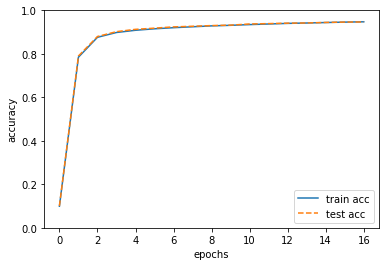

In [62]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()